In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [105]:
df = pd.read_csv('concrete_data.csv')
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [106]:
df.shape

(1030, 9)

In [107]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

### Check for the linear relation between the data

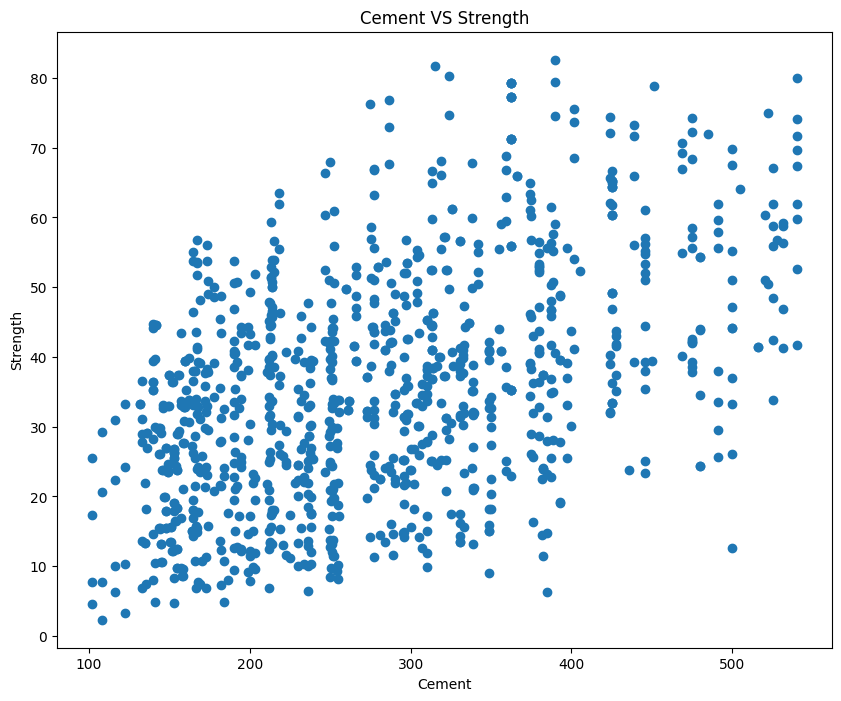

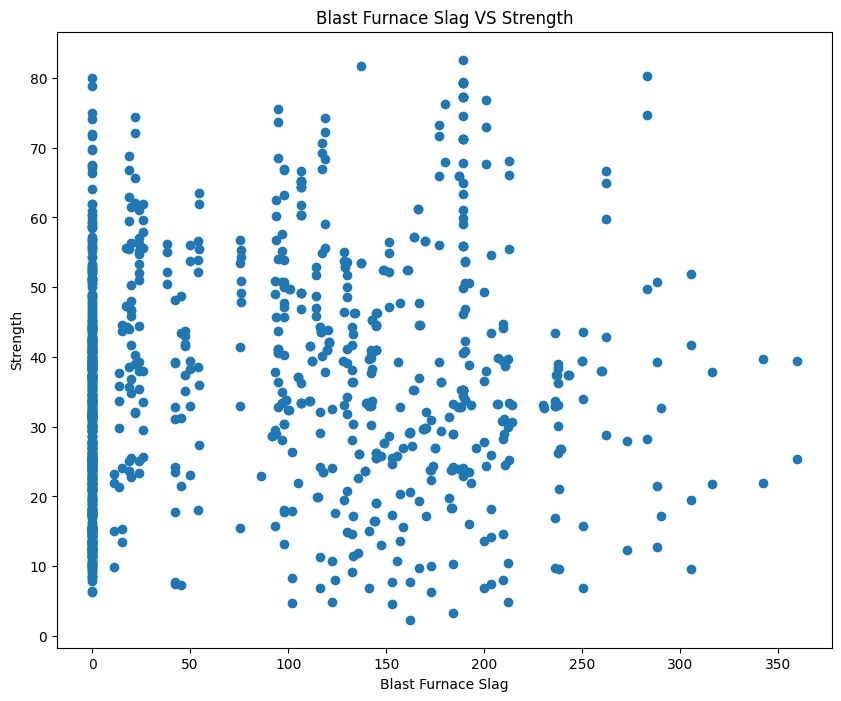

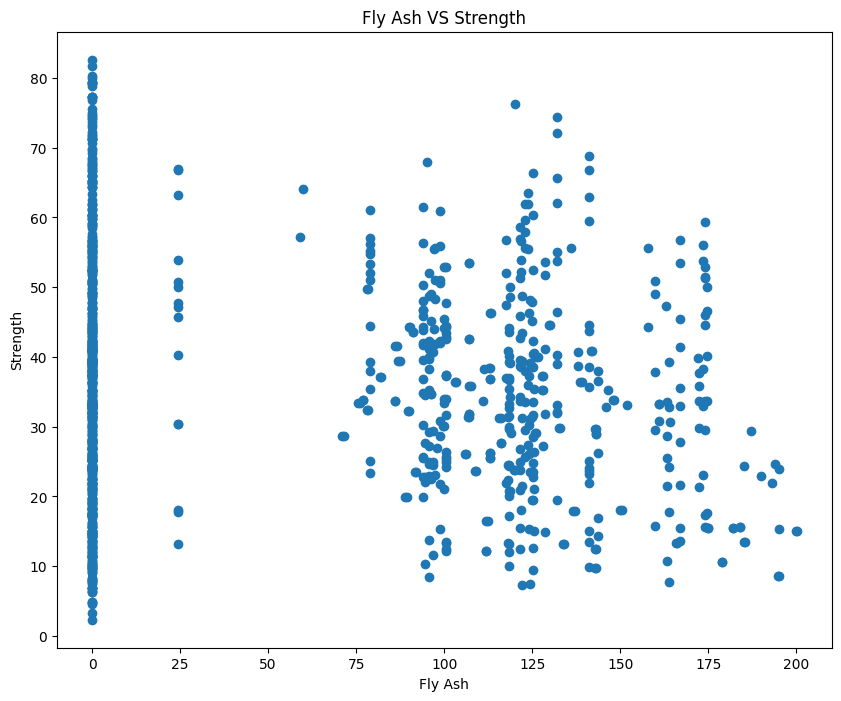

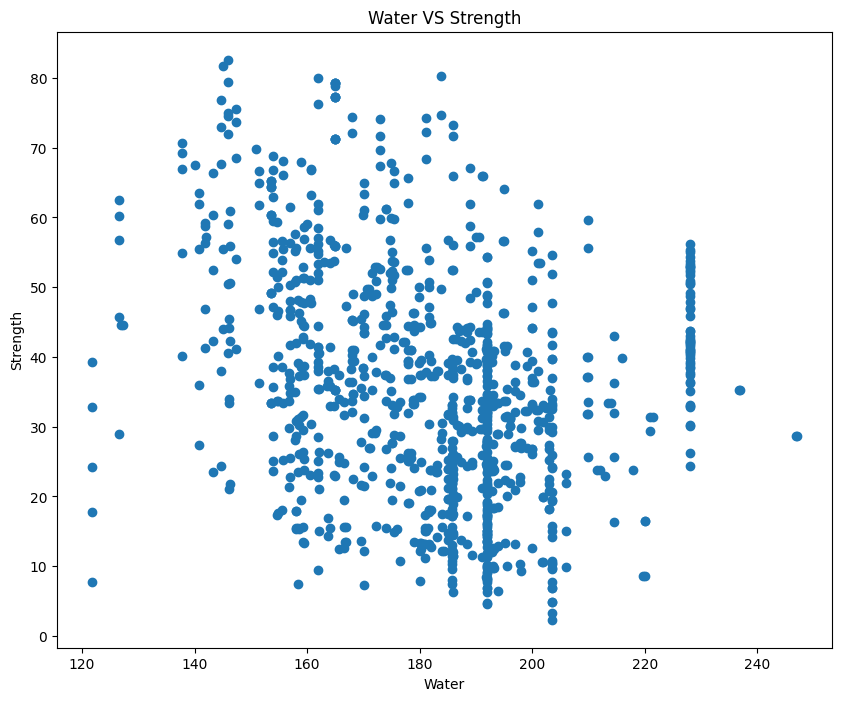

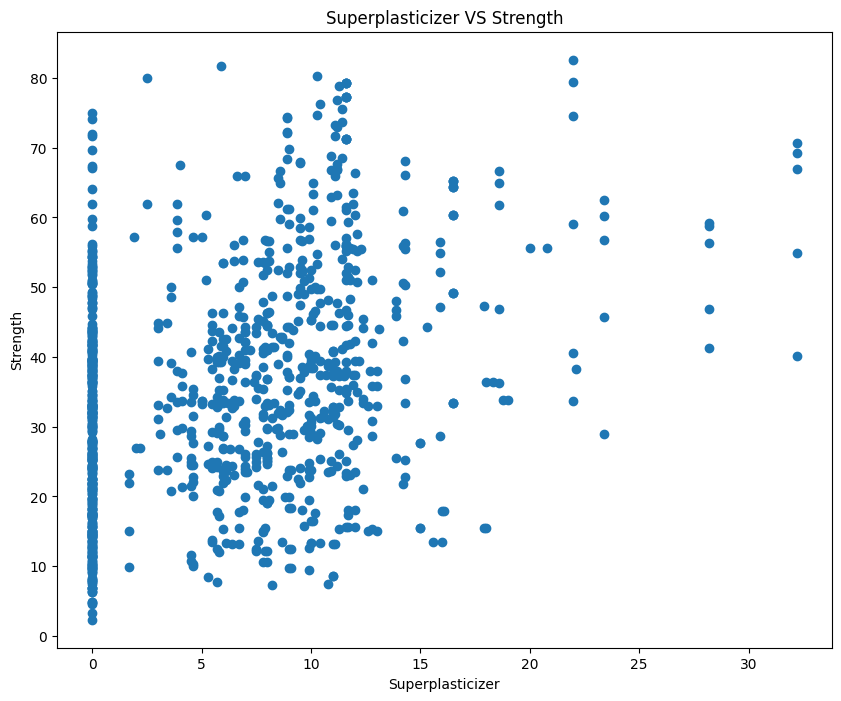

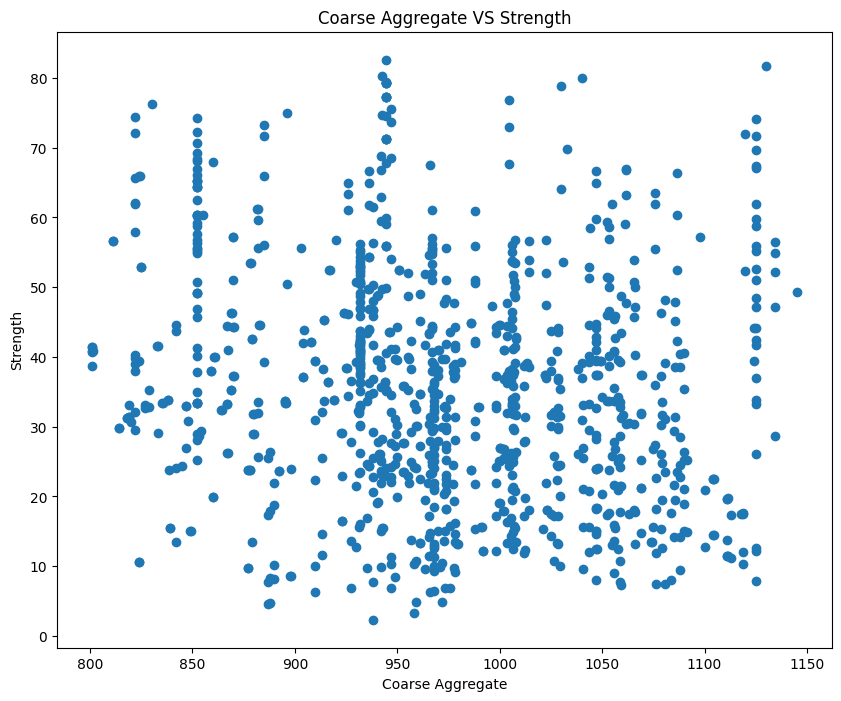

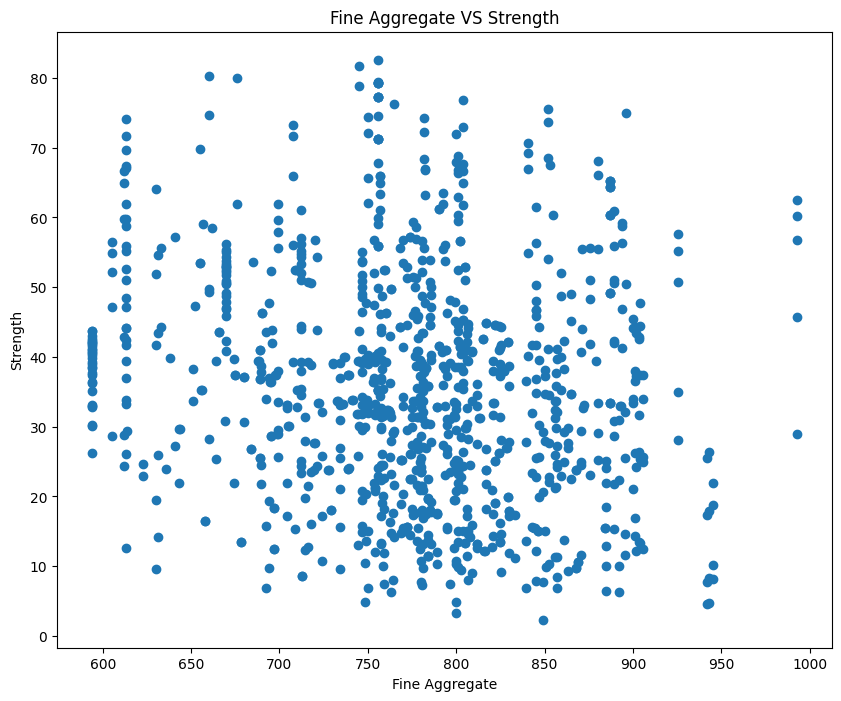

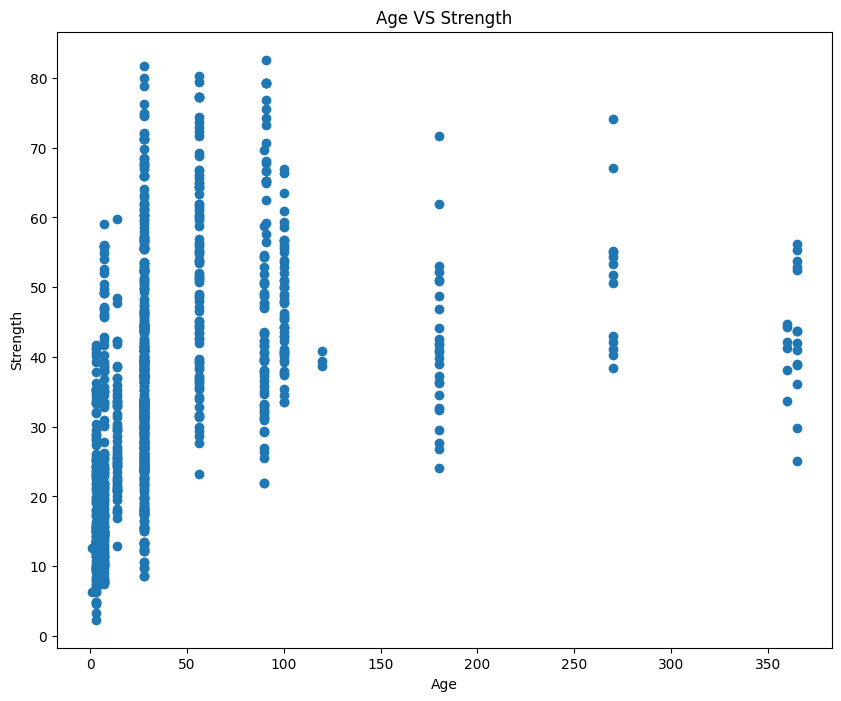

In [108]:
traget_var = 'Strength'
for col in df.columns:
    if col != traget_var:
        
        plt.figure(figsize=(10,8))
        plt.scatter(df[col],df['Strength'])
        plt.ylabel(f'Strength')
        plt.xlabel(f'{col}')
        plt.title(f'{col} VS {traget_var}')
        plt.show()

In [109]:
for i,col in enumerate(df.columns):
    print(col)

Cement
Blast Furnace Slag
Fly Ash
Water
Superplasticizer
Coarse Aggregate
Fine Aggregate
Age
Strength


### Outliers Detection

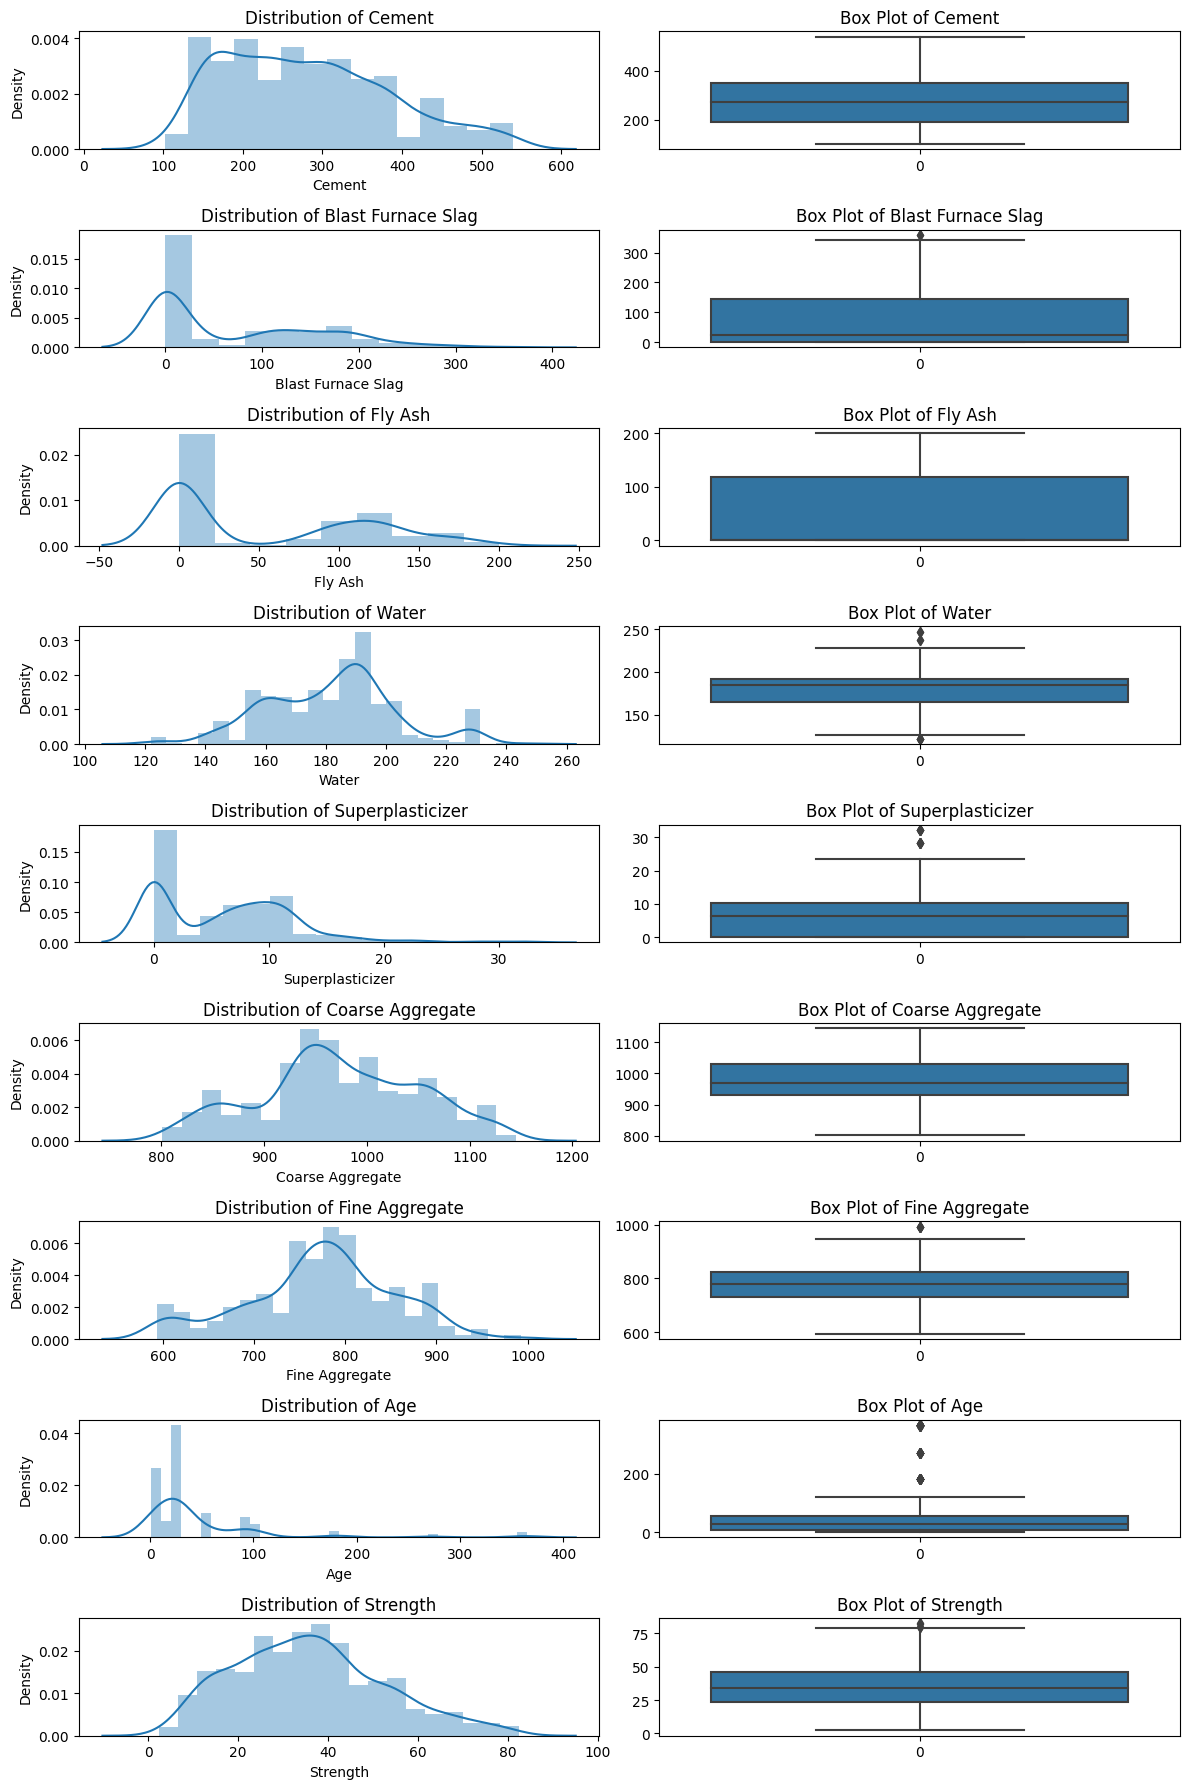

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure
plt.figure(figsize=(12, 2 * len(df.columns)))

# Loop through columns
for i, col in enumerate(df.columns):
    # Create a distribution plot
    plt.subplot(len(df.columns), 2, 2*i+1)
    sns.distplot(df[col])
    plt.title(f'Distribution of {col}')
    
    # Create a boxplot
    plt.subplot(len(df.columns), 2, 2*i+2)
    sns.boxplot(df[col])
    plt.title(f'Box Plot of {col}')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


In [111]:
from sklearn.model_selection import train_test_split
X = df.drop(['Strength'],axis=1)
y = df['Strength']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

### Check for the corelation

<Axes: >

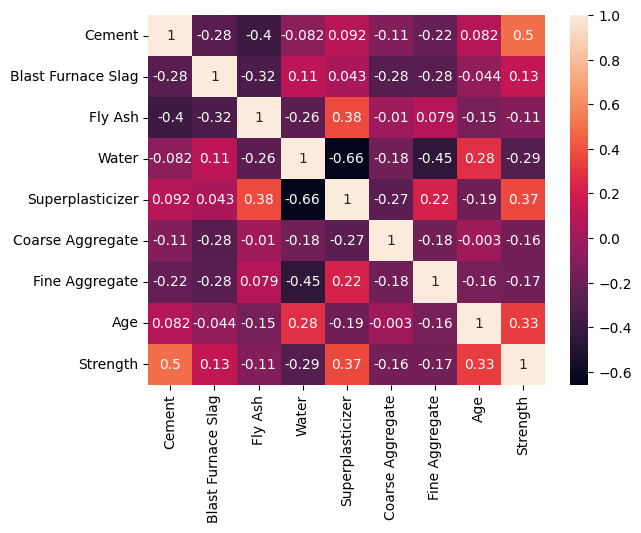

In [112]:
sns.heatmap(df.corr(),annot=True)

### VIF

In [113]:
'''from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = df.columns

for i in range(X_train.shape[1]):

    vif['vif'] = variance_inflation_factor(df,i)
'''

"from statsmodels.stats.outliers_influence import variance_inflation_factor\nvif = pd.DataFrame()\nvif['Features'] = df.columns\n\nfor i in range(X_train.shape[1]):\n\n    vif['vif'] = variance_inflation_factor(df,i)\n"

### Feature transformation


In [114]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_col = X.select_dtypes(include=[int, float]).columns

# Define the transformer for numerical columns and a pass-through for the rest
preprocessor = ColumnTransformer(
    transformers=[
        ('standard_scaler', StandardScaler(), num_col)
    ],
    remainder='passthrough'
)

# Fit and transform the training data
X_train_scaled = preprocessor.fit_transform(X_train)

# Transform the test data
X_test_scaled = preprocessor.transform(X_test)


In [115]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_train_scaled

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,-1.160877,0.857387,0.982449,-0.314285,1.481654,-0.257462,-0.647520,-0.275673
1,1.308623,-0.602492,1.232598,-0.178192,0.391715,-1.926950,-0.273148,-0.275673
2,-0.076865,-0.855584,1.066874,-1.046371,0.626471,1.017859,0.066628,-0.689313
3,-0.291807,0.260321,0.357076,0.572666,0.307873,-1.761654,0.604093,-0.275673
4,-1.065038,-0.370108,1.112214,-1.102686,0.777385,1.363709,0.297676,-0.689313
...,...,...,...,...,...,...,...,...
819,0.027349,1.455604,-0.831134,-1.740915,0.844459,0.394821,0.390343,-0.689313
820,-0.340192,-0.855584,1.124721,-1.806615,0.978605,1.440000,0.355747,-0.507312
821,-0.865914,-0.855584,1.126285,-0.713178,0.626471,1.340822,0.331036,0.915611
822,1.783169,0.511112,-0.831134,-0.032713,0.458788,-1.544226,0.116050,-0.275673


In [116]:
X_train_scaled.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
count,8.240000e+02,8.240000e+02,8.240000e+02,8.240000e+02,8.240000e+02,8.240000e+02,8.240000e+02,8.240000e+02
mean,2.996524e-16,3.449237e-17,8.623091e-18,1.069263e-15,-1.552156e-16,4.182199e-16,-6.424203e-16,-3.018082e-17
std,1.000607e+00,1.000607e+00,1.000607e+00,1.000607e+00,1.000607e+00,1.000607e+00,1.000607e+00,1.000607e+00
min,-1.687530e+00,-8.555837e-01,-8.311336e-01,-2.815580e+00,-1.033590e+00,-2.193966e+00,-2.200608e+00,-7.224046e-01
25%,-8.500962e-01,-8.555837e-01,-8.311336e-01,-7.929568e-01,-1.033590e+00,-5.282924e-01,-5.601049e-01,-5.362665e-01
50%,-7.686530e-02,-6.024919e-01,-8.311336e-01,1.667333e-01,-1.072438e-02,-7.055009e-02,7.898379e-02,-2.756731e-01
75%,7.121838e-01,8.099328e-01,1.018408e+00,4.788085e-01,6.641995e-01,8.525636e-01,6.071818e-01,1.876039e-01
max,2.387983e+00,3.279016e+00,2.217561e+00,3.059882e+00,4.365800e+00,2.180016e+00,2.724298e+00,5.300197e+00


In [117]:

from sklearn.metrics import mean_squared_error, r2_score

# Regression Models
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR


# Cross-Validation
from sklearn.model_selection import cross_val_score

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Feature Selection
from sklearn.feature_selection import SelectKBest, RFE




In [118]:
models = {
    'linear_regression': LinearRegression(),
    'lasso_regression': Lasso(),
    'ridge_regression': Ridge(),
    'elastic_net_regression': ElasticNet(),
    'decision_tree_regression': DecisionTreeRegressor(),
    'random_forest_regression': RandomForestRegressor(),
    'gradient_boosting_regression': GradientBoostingRegressor(),
    'ada_boost_regression': AdaBoostRegressor(),
    'support_vector_regression': SVR(),
}


In [119]:
def evaluate_model(acutal_val,predicted_value):
    mae = mean_squared_error(acutal_val,predicted_value)
    mse = mean_squared_error(acutal_val,predicted_value)
    rmse = np.sqrt(mean_squared_error(acutal_val,predicted_value))
    r2_square = r2_score(acutal_val,predicted_value)

    return mae,rmse,r2_square

In [120]:
models.items()
model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train_scaled,y_train)

    #making prediction
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    #model evaluation
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train,y_train_pred)
    mode_test_mae, model_test_rmse , model_test_r2 = evaluate_model(y_test,y_test_pred)

    print(list(models.values())[i])
    model_list.append(list(models.values())[i])

    print("Model prediction for Traning set")
    print(f'RMSE{model_train_rmse}')
    print(f'MAE{model_train_mae}')
    print(f'R2_score{model_train_r2}')

    print('----------------------------------')

    print("Model prediction for Testing set")
    print(f'RMSE{model_test_rmse}')
    print(f'MAE{mode_test_mae}')
    print(f'R2_score{model_test_r2}')
    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')

LinearRegression()
Model prediction for Traning set
RMSE10.5187873348198
MAE110.64488699516544
R2_score0.6105238047649741
----------------------------------
Model prediction for Testing set
RMSE9.796475901624362
MAE95.97094009110684
R2_score0.6275531792314848


Lasso()
Model prediction for Traning set
RMSE11.085893758054791
MAE122.89704041487816
R2_score0.5673955389504496
----------------------------------
Model prediction for Testing set
RMSE10.600404116533975
MAE112.36856743383045
R2_score0.5639167892352364


Ridge()
Model prediction for Traning set
RMSE10.519137619104995
MAE110.6522562496699
R2_score0.6104978645766468
----------------------------------
Model prediction for Testing set
RMSE9.796178196607414
MAE95.9651072596865
R2_score0.6275758154536217


ElasticNet()
Model prediction for Traning set
RMSE11.93111802132799
MAE142.35157723885754
R2_score0.498914480421335
----------------------------------
Model prediction for Testing set
RMSE11.18432258466902
MAE125.08907167793754
R2_s

### Applying Cross val score
RandomForestRegressor :
GradientBoostingRegressor
AdaBoostRegressor

In [121]:
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor()
cross_val_score(rf,X_train,y_train,cv=5,scoring='r2').mean()


0.9061500887844514

In [122]:
gf = GradientBoostingRegressor()
cross_val_score(gf,X_train,y_train,cv=5,scoring='r2').mean()

0.9015657295528209

## Model Traning for Gradient Boosting

In [157]:
gf = GradientBoostingRegressor(n_estimators=400,learning_rate=0.2,max_features='sqrt',subsample=1.0)
gf.fit(X_train_scaled,y_train)
y_pred = gf.predict(X_test_scaled)
r2_score(y_test,y_pred)

0.9365571051660311